<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/Titanic/1_2_titanic_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kaggle json
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.1MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.07MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.0MB/s]


* 타이타닉은 아시다시피 사상최고의 해난사고로 1500여명의 희생자가 생겼다
* 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것이다.
* 여러 시각화도구(matplotlib, seaborn, plotly), 데이터분석 도구(pandas, numpy), 머신러닝 도구 (sklearn)을 사용할 것이다.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno # nan 시각화하기 좋다.

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

앞으로 해야할 프로세스는 다음과 같다
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제가 되어있다. 하지만 가금 null data가 존재한다. 확인 후 수정해야한다
2. 탐색적 데이터분석(exploratory data analysis)(EDA)여러 feature들을 개별적으로 분석하고, feature들간의 상관관계를 확인한다. 여러 시각화 툴을 사용하여 insight를 얻는다.
3. feature enfineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering한다. one-hot encodding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 한다.
4. modle 만들기 - sklearn 을 사용해서 모델을 만든다. sklearn을 사용하면 여러 알고리즘을 일관된 문법으로 다룰 수 있다.
5. 모델 학습 및 예측 - trainset을 가지고 모델을 학습시킨 후, testset을 가지고 prediction한다.
6. 모델평가 - 예측성능이 원하는 수준인지 판단한다.

# 1. Dataset 확인
* 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화 되어있으며, 많이 쓰이는 라이브러리는 pandas이다. 
* 우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다.
* 파이썬으로 데이터분석을 한다고 하면, 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복해서 공부하기 권장
*

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 우리가 다루는 문제에서 featue는 Pclass, Age , SibSp, Parch, Fare이며, 예측하려는 target label은 Survived이다

* pandas dataframe에는 describe()메소드가 있다. 이를 쓰면 각 feature가 가진 통계치들을 반환해준다.

In [ ]:
df_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sawyer, Mr. Frederick Charles",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df_test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Earnshaw, Mrs. Boulton (Olive Potter)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


* 테이블에서 보다시피, PassenserID 숫자와 다른 , 즉 null data가 존재하는 열(feature)가 있는것 같다.
* 이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴보자

* 1.1 NUll data check

In [ ]:
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [ ]:
for col in df_test.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


* train, test set 에서 Age(둘다 20%), Cabin(둘다 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있다.
* mano라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.

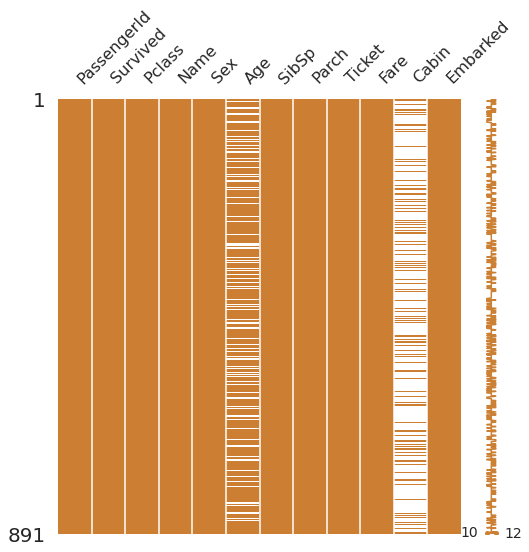

In [ ]:
msno.matrix(df=df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

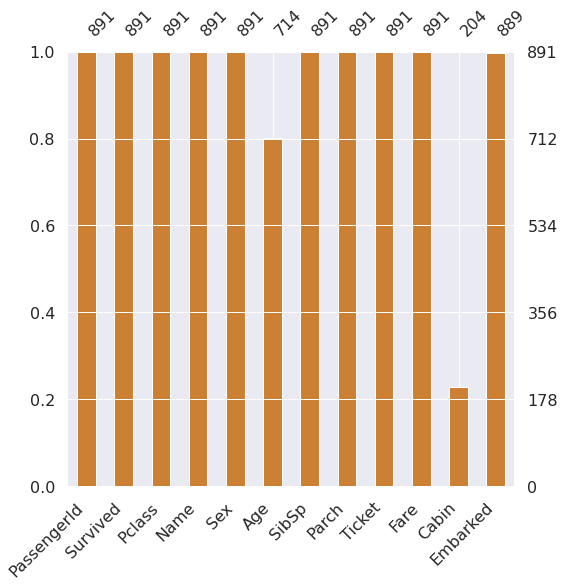

In [ ]:
msno.bar(df=df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

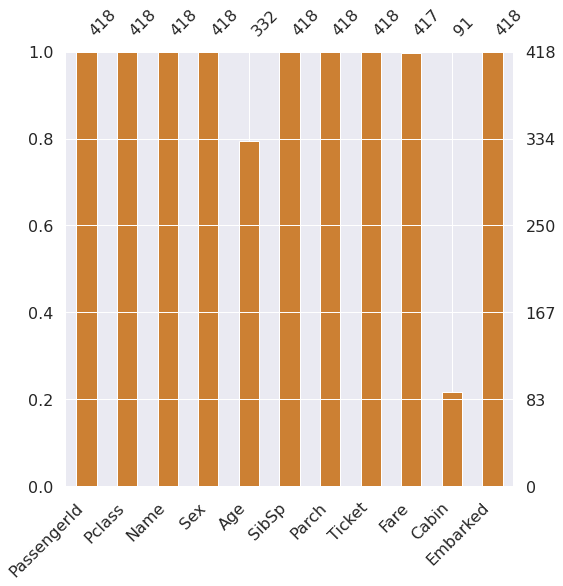

In [ ]:
msno.bar(df=df_test, figsize=(8,8), color=(0.8, 0.5, 0.2))

### 1.2 Target label확인
* target label이 어떤 distribution을 가지고 있는지 확인해봐야한다.
* 지금같은 binary classification문제의 경우에서 1과 0의 분포가 어떤냐에 따라 모델의 평가방법이 달라 질 수 있다.


Text(0.5, 1.0, 'Count plot - Survived')

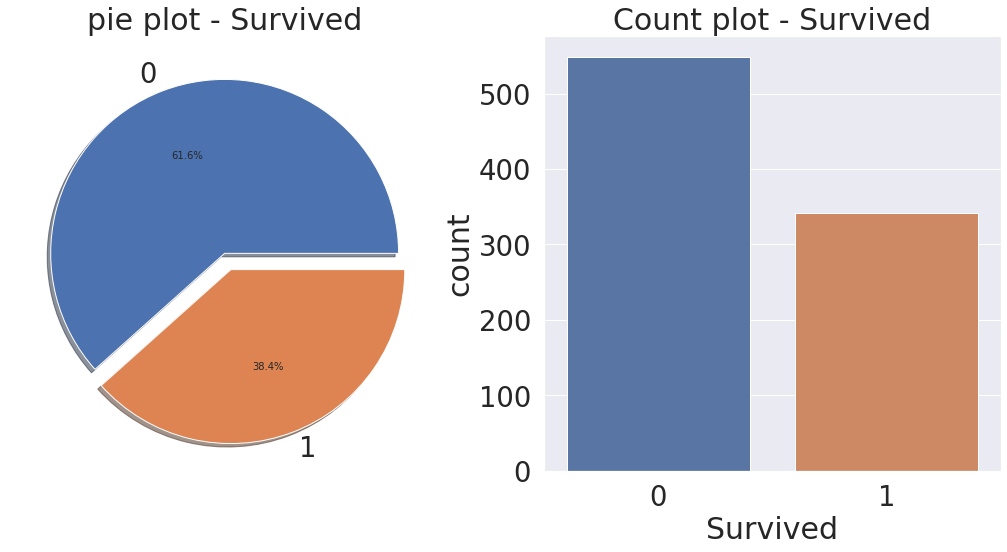

In [ ]:
f, ax= plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# explode = 얼마나 떨어트려놓는지
ax[0].set_title('pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')


* 38.4%가 살아남았다
* target label의 분포가 제법 균일하다. 불균일한다면 다른 방법을 취해야한다.

# 2. Exploratory data analysis(EDA)
* 이제 본격적으로 데이터 분석을해보겠다. 데이터 안에 숨겨진 사실을찾기위해 적절한 시각화가 필요하다
* 시각화 라이브러리는 matplotlib, seaborn, plotly등이 있다. 특정 목적에 맞는 소스코드를 정해두어 필요할 때마다 참고하면 편하다.

### 2.1 Pclass
* 먼저 Pclass에 대해서 살펴보겠다. Pclass는 ordinal, 서수형 데이터이다, 카테고리이면서, 순서가있는 데이터이다
* 먼저 Pclass에 따른 생존률 차이를 보겠다. 엑셀의 피벗 차트와 유사한 작업을 하게되는데, groupby를 사용하면 쉽게 할 수 있다. 또한 pivot이라는 메소드도 있다
* Pclass, Survived를 가져온 후 Pclass로 묶는다. 그러고나면 각 Pclass 마다 0, 1 이 count가 되는데 이를 평균내면 Pclass별 생존률이 나온다
* 아래와 같이 count()를 하면 각 class에 몇명이 있는지확인 할 수 있다. sum()을 하면 216명중 생존한 (survived=1)사람의 총합을 주게된다

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()
# as_index를 True로 주게되면 복합인덱스로 반환해서 index를 표시하지않는다

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


* pandas의 crosstab을 사용하면 위의 과정을 더 수월하게 볼 수 있다.

In [ ]:
# margins= True로 주면 All 정보까지 나온다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* grouped객체에 mean()을 하게되면, 각 클래스별 생존률을 얻을 수 있다.

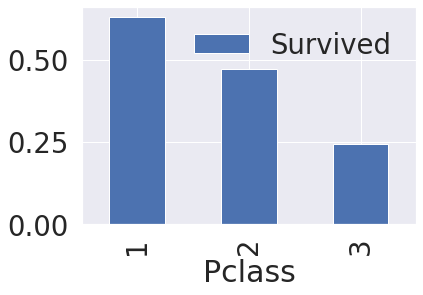

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

* 보다시피 Pclass가 좋을 수록 (1st) 생존률이 높은 것을 확인 할 수 있다.
* 좀더 보기 쉽게 그래프를 그려보겠다. seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인해 볼 수 있다.

Text(0.5, 1.02, 'Pclass: Survived vs Dead')

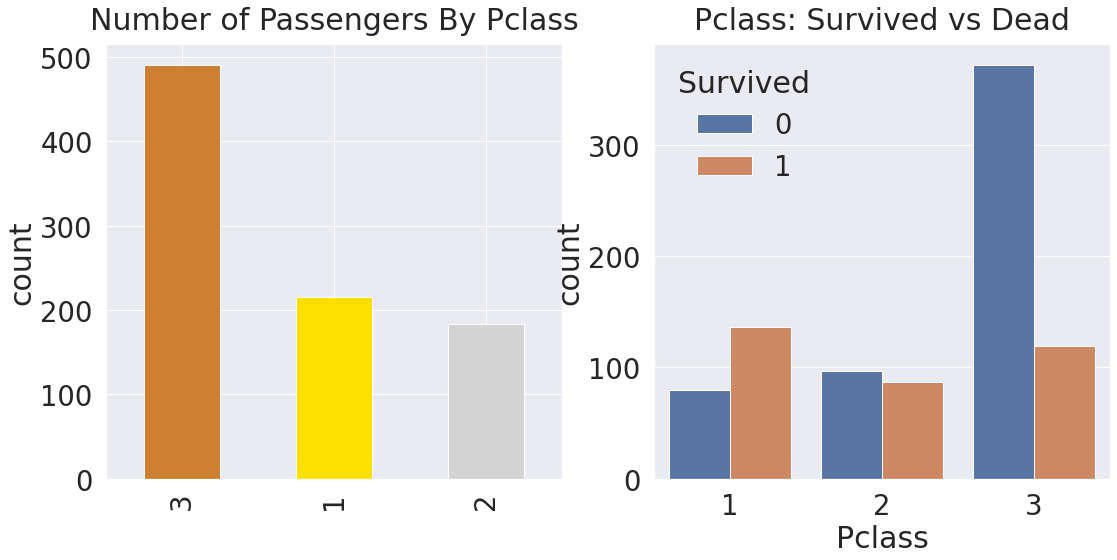

In [ ]:
y_position= 1.02
f, ax= plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue= 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)


* 클래스가 높을 수록, 생존확률이 높은 것을 확인 할 수 있다.
* 생존에 Pclass가 큰 영향을 미친다고 생각해 볼 수 있다.

### 2.2 Sex
* 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해 보겠다.
* 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화해보겠다.

Text(0.5, 1.0, 'Sex: Survived vs Dead')

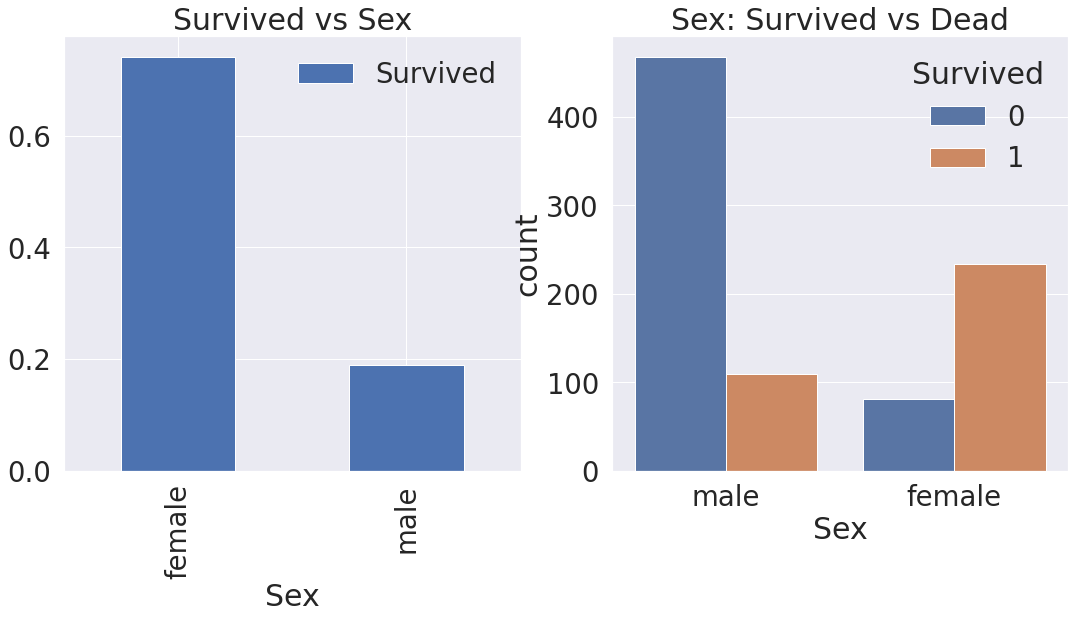

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

* 여성의 생존확률이 더 높다

In [ ]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* Pclass와 마찬가지로 sex도 예측모델에 쓰일 중요한 feature이다

### 2.3 Both Sex and Pclass
* 이번엔 Sex Pclass두가지에 관하여 생존이 어떻게 달라지는지 확인해 보자
* seaborn의 factorplot을 이용하면, 손쉽게 3 개의 차원으로 이루어진 그래프를 그릴 수 있다.


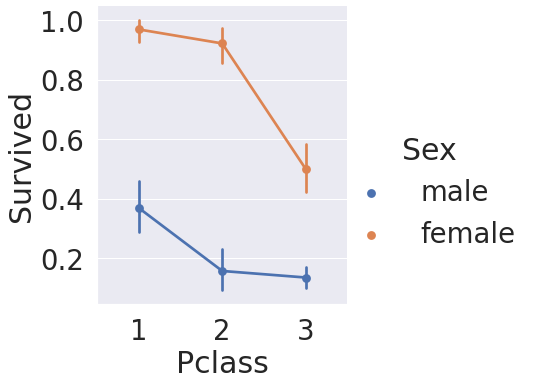

In [ ]:
sns.factorplot('Pclass', 'Survived', data= df_train, hue='Sex')

* 모든 클래스에서 femal이 살 확률이 male보다 높다
* 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다
* 위 그래프는 hue대신 column으로하면 아래와 같아진다

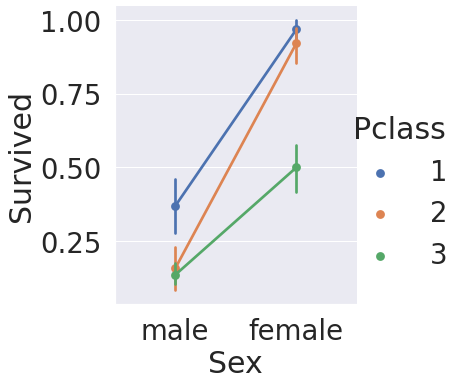

In [ ]:
sns.factorplot('Sex', 'Survived', data=df_train, hue="Pclass")

### 2.4 Age
* 이번에는 Age 를 살펴보겠다.

In [ ]:
print('제일 나이가 많은 탑승객 : {:.2f}'.format(df_train['Age'].max()))
print('제일 나이가 적은 탑승객 : {:.2f}'.format(df_train['Age'].min()))
print('탑승객 평균나이 : {:.2f}'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80.00
제일 나이가 적은 탑승객 : 0.42
탑승객 평균나이 : 29.70


* 생존에 따른 Age의 histogram을 그려보겠다

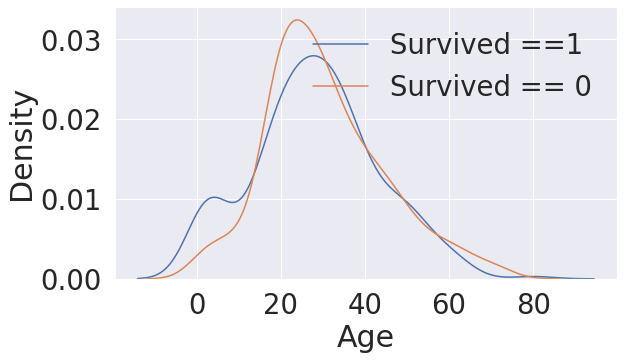

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived ==1','Survived == 0'])

* 보다시피 생존자중 나이가 어린 경우를 많이 볼수 있다.

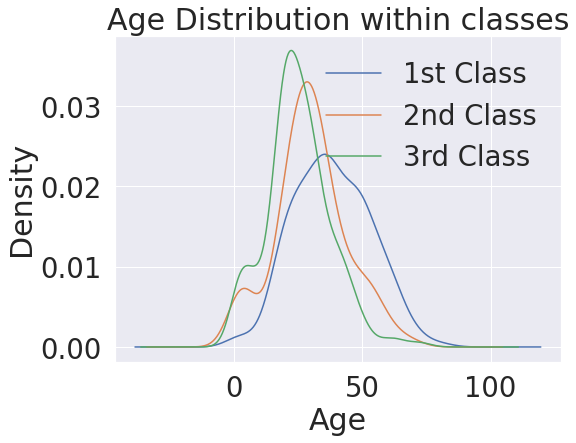

In [ ]:
f, ax = plt.subplots(1,1, figsize=(8,6))
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==2]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==3]['Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* class 가 높을 수록 나이많은 사람의 비중이 커짐
* 나이대가 변하면서 생존률이 어떻게 되는지 보려한다.
* 나이대 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 보겠다

[1.0, 0.8571428571428571, 0.625, 0.6666666666666666, 0.675, 0.7045454545454546, 0.7021276595744681, 0.68, 0.6666666666666666, 0.6129032258064516, 0.59375, 0.5735294117647058, 0.5797101449275363, 0.5915492957746479, 0.5769230769230769, 0.5903614457831325, 0.55, 0.5398230088495575, 0.5035971223021583, 0.4817073170731707, 0.45555555555555555, 0.4264705882352941, 0.42424242424242425, 0.41700404858299595, 0.4244604316546763, 0.4119601328903654, 0.40752351097178685, 0.41839762611275966, 0.4065934065934066, 0.40625, 0.40389294403892945, 0.40654205607476634, 0.4107142857142857, 0.4103671706263499, 0.4091858037578288, 0.4164989939637827, 0.41923076923076924, 0.41634980988593157, 0.4171322160148976, 0.41560798548094374, 0.41519434628975266, 0.4143356643356643, 0.4153846153846154, 0.4135593220338983, 0.41235392320534225, 0.4110929853181077, 0.4090909090909091, 0.4048, 0.4085173501577287, 0.4109375, 0.4123076923076923, 0.410958904109589, 0.4117647058823529, 0.4126506024096386, 0.41220238095238093,

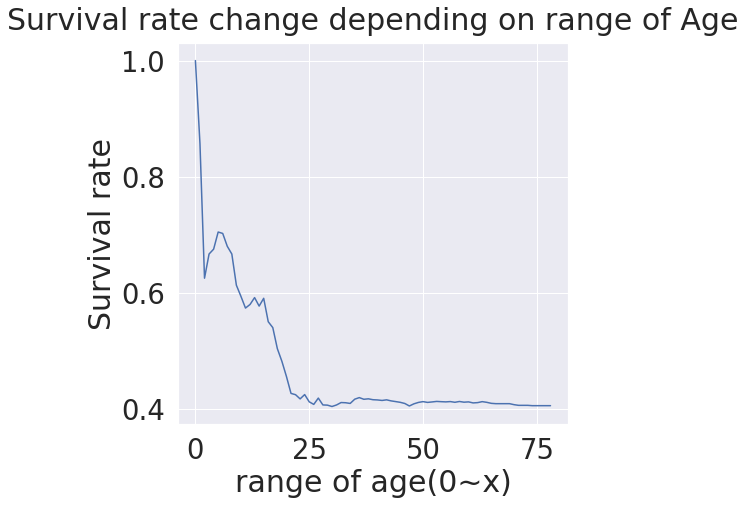

In [ ]:
cummulate_survival_ratio = []
for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / df_train[df_train['Age']<i]['Survived'].count())

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('range of age(0~x)')
print(cummulate_survival_ratio)

* 보다시피 나이가 어릴 수록 생존률이 확실히 높은 것을 볼 수 있다.
* 나이가 중요한 feature로 쓰일 수 있음을 확인

### 2.5 Pclass, Sex, Age
* 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶다. violineplot을 사용하면 쉽게 그릴수있다. 
* x 축은 나눠서 보고싶어하는 case(여기선 Pclass, Sex)를 나타내고, y 축은 보고싶어하는 distribution(Age)이다

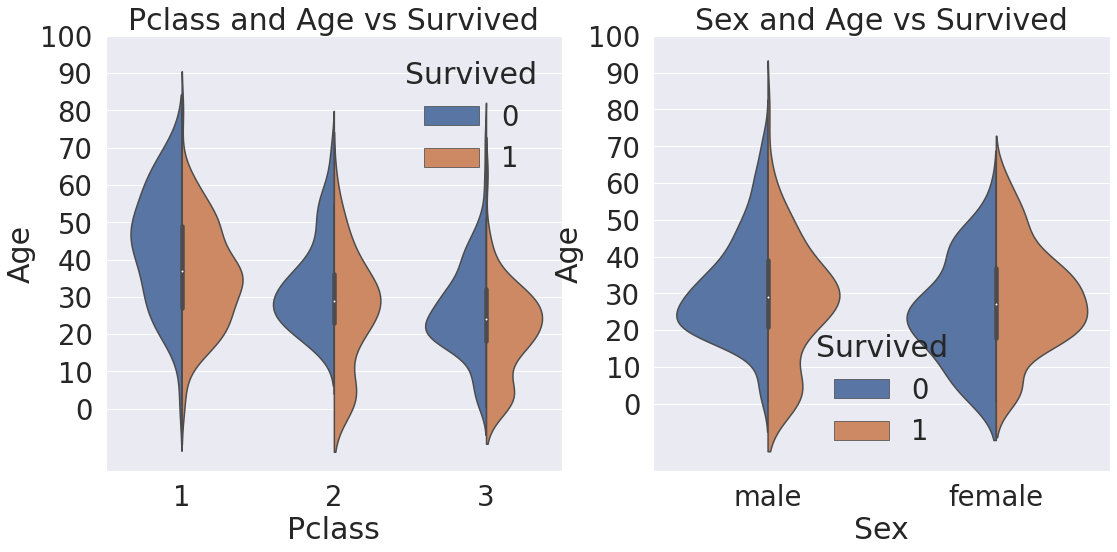

In [ ]:
f , ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='Pclass', y= 'Age', data=df_train, hue="Survived", split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y='Age', data=df_train, hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 왼쪽은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프이다.
* 오른쪽 그림도 마찬가지 sex, 생존여부에 따른 distribution이 어떻게 다른지 보여주는 그래프
* 생존만 봤을때 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수있다.
* 오른쪽 그림에서 보면, 명확하게 여자가 생존을 많이 한 것을 볼 수 있다.
* 여성과 아이를 먼저 챙긴것을 볼 수 있다.

### 2.6 Embarked
* Embarked는 탑승한 항구를 나타낸다.
* 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률을 보겠다

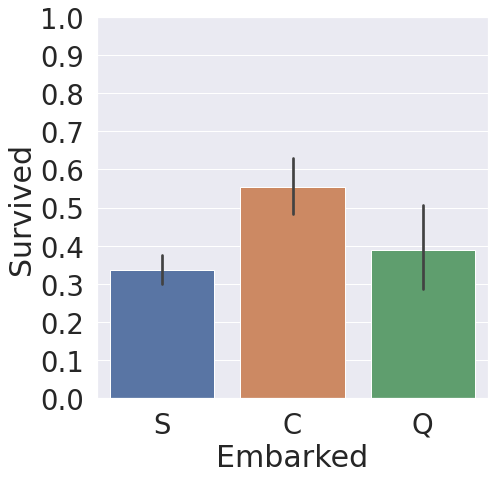

In [ ]:
f, ax= plt.subplots(1,1,figsize=(7,7))
sns.barplot(x='Embarked', y='Survived', data=df_train, ax=ax)
ax.set_yticks(np.arange(0,1.1,0.1));

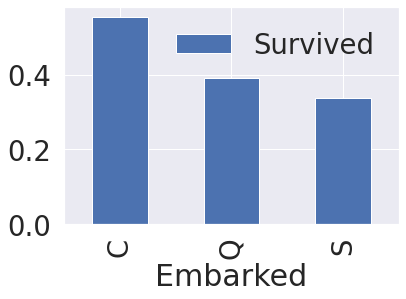

In [ ]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

* 조금의 차이는 있지만 생존률은 비슷한 것 같다
* 모델에 얼마나 큰 영향을 미친지는 모르겠지만, 그래도 사용해 보겠다.
* 사실 모델을 만들고 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있다.

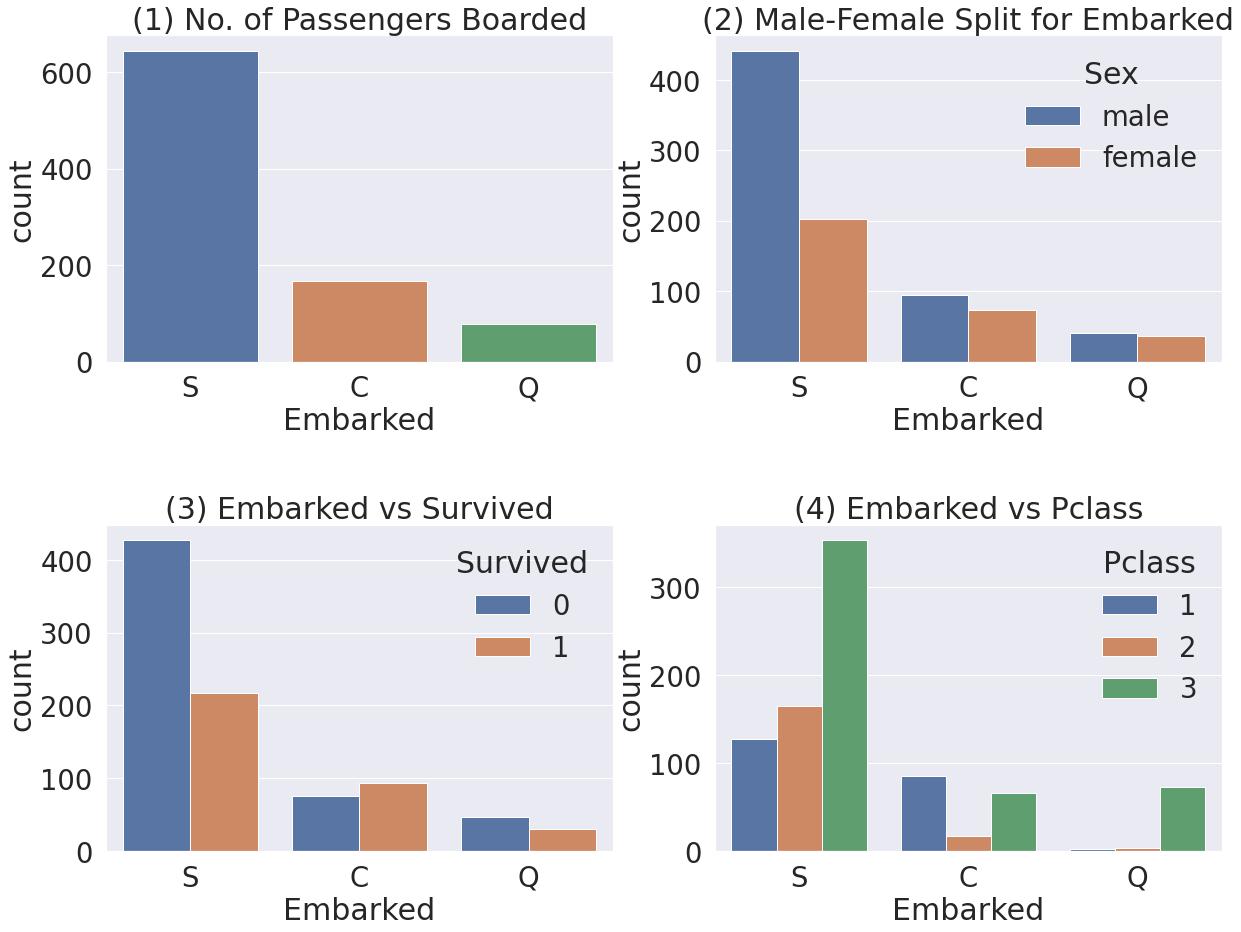

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0][0])
ax[0][0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked', data=df_train, hue='Sex', ax=ax[0][1])
ax[0][1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', data=df_train, hue='Survived', ax=ax[1][0])
ax[1][0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', data=df_train, hue='Pclass', ax=ax[1][1])
ax[1][1].set_title('(4) Embarked vs Pclass')
# 이상태로 출력하면 겹쳐보이게된다.
# plt.subplots_adjust로 여백을 준다
plt.subplots_adjust(wspace=0.2, hspace=0.5)

* figure 1 - S 에서 가장 많은 사람이 탑승했다.
* figure 2 - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
* figure 3 - 생존확률이 S인 경우 많이 낮은 걸 볼수있다.
* figure 4 - Class 로 split해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇다

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
* SibSp와 Parch를 합하면 Family가 될 것이다.

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

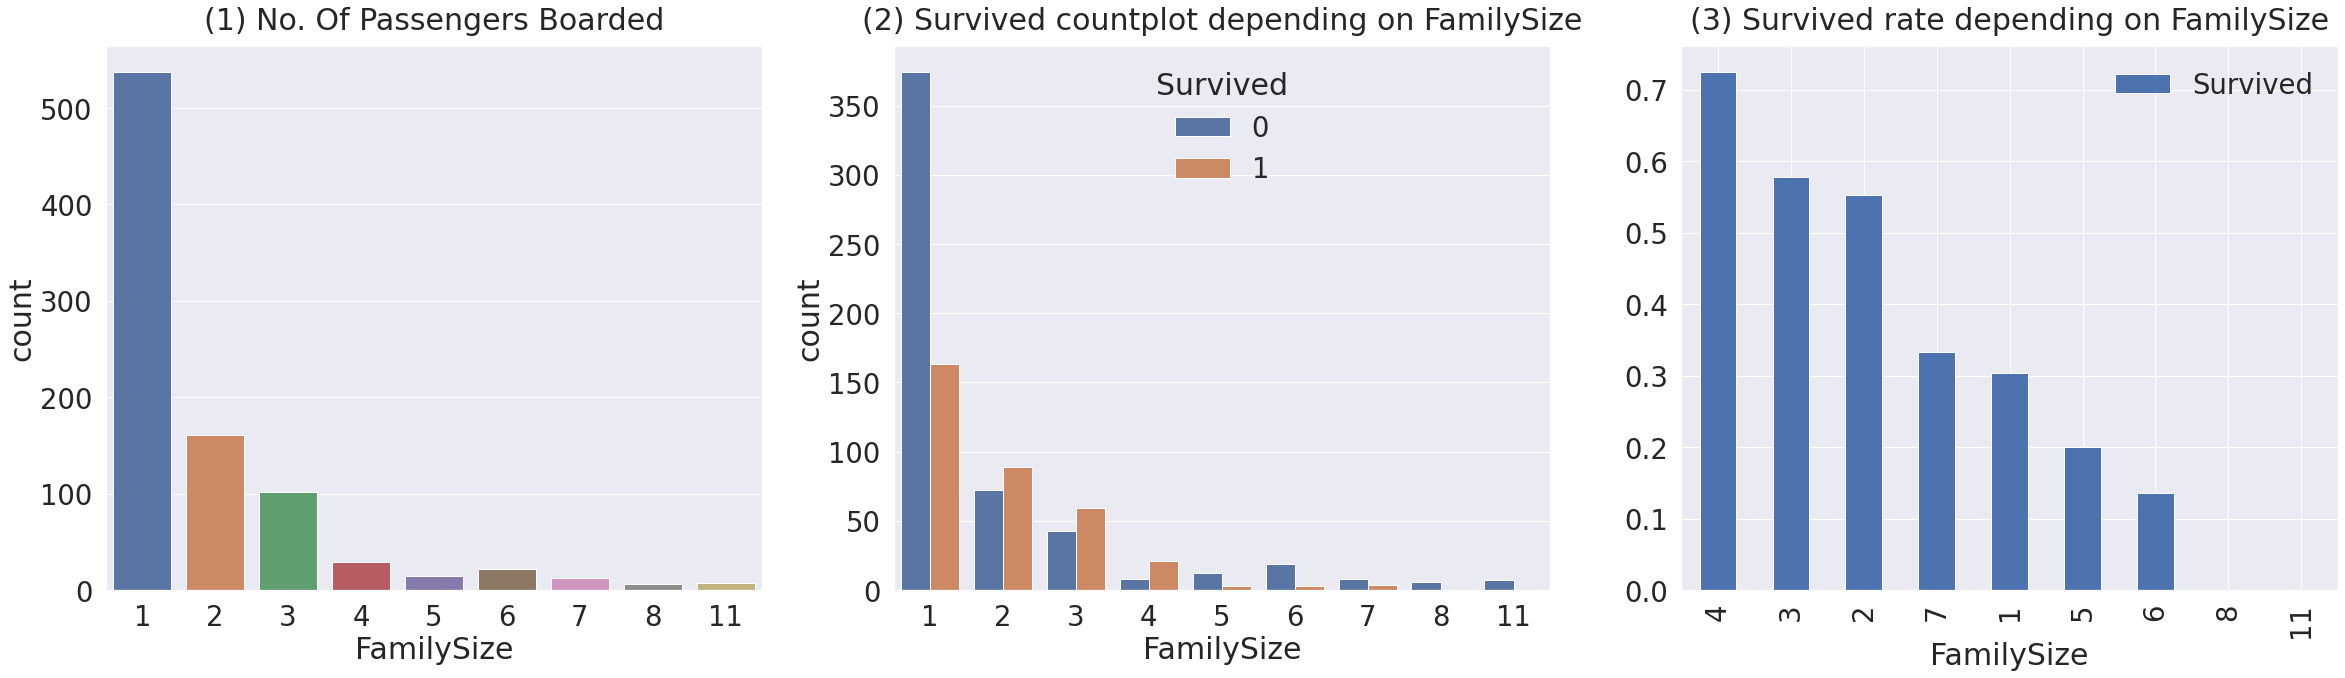

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* figure 1 - 가족크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2, 3, 4명이다
* figure 2 ,3 - 가족 크기에 따른 생존비교 가족수가 너무 적어도, 많아도 생존률이 낮다

### 2.8 Fare
* Fare는 탑승요금이며, contious feature 이다. histogram을 그려보겠다

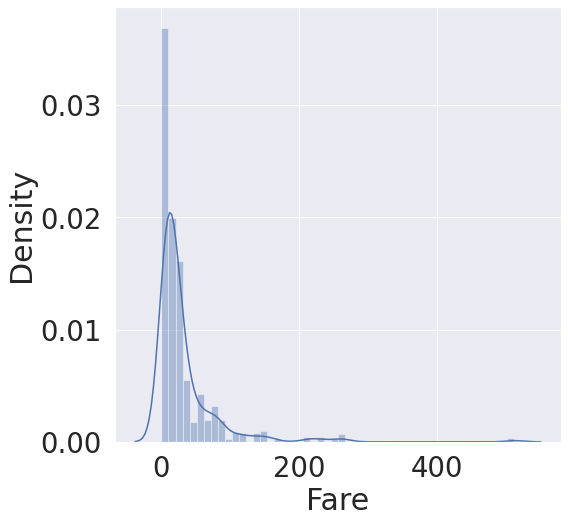

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(a=df_train['Fare'])

* 매우 비대칭적인 distribution을 보인다. 이대로 모델에 넣으면 자칫 모델이 잘못학습할 수도있다.
몇개없는 ouplier에 대해서 너무 민감하게 반응한 다면, 실제 예측시에 좋지 못한 결과를 부를 수있다.
* outlire의 영향을 줄이기위해 Fare에 log를 취하겠다.
* pandas의 map, apply를 사용하면 손쉽게 바꿀수 있다.
* 파이썬의 lambda를 이용하면 쉽게 바꿀 수 있다.

In [ ]:
df_test[df_test['Fare'].isnull()]['Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

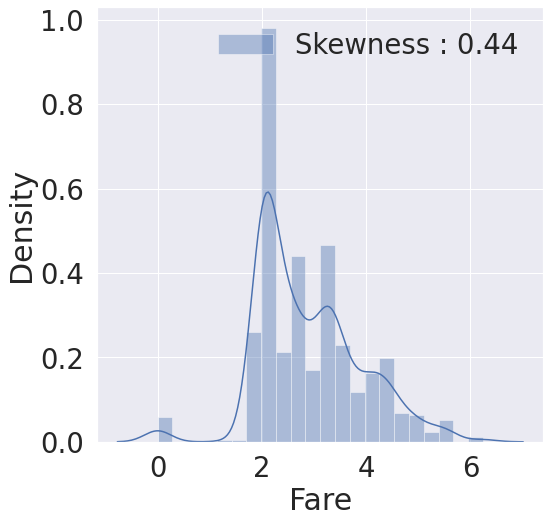

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()))
plt.legend(loc='best')

* log를 취하니 비대칭성이 많이 사라진 것을 볼 수있다.
* 이러한 작업을 통해 모델이 좀더 좋은 성능을 내도록 할 수 있다.
* 이부분은 feature engineering부분인데 여기서 했다.

### 2.9 Cabin
* 이 feature는 결측치가 80% 이므로 사용하지 않도록 하겠다